# Connected-element Analysis
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
- Notebook: [connectedComponent_analysis.ipynb](https://github.com/diegoinacio/computer-vision-notebooks/blob/master/Computer-Vision-Fundamentals/connectedComponent_analysis.ipynb)
---
Find and label bi-dimensional subsets of connected elements.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from connectedComponent_analysis_plot import *
from _utils import histogram

Given an input grid, find the connected-components.

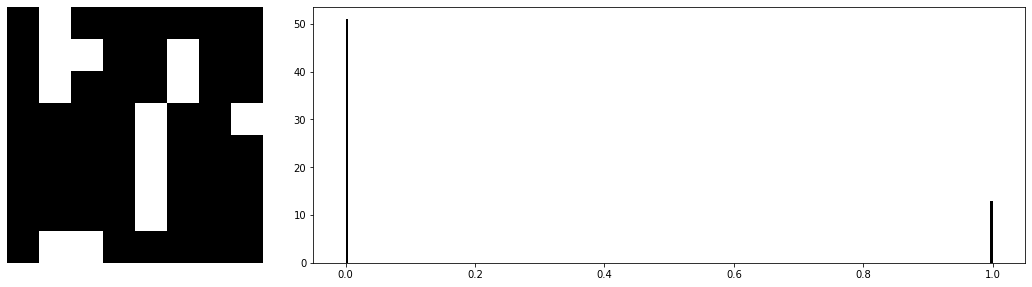

In [2]:
grid = [
    [ 0, 1, 0, 0, 0, 0, 0, 0],
    [ 0, 1, 1, 0, 0, 1, 0, 0],
    [ 0, 1, 0, 0, 0, 1, 0, 0],
    [ 0, 0, 0, 0, 1, 0, 0, 1],
    [ 0, 0, 0, 0, 1, 0, 0, 0],
    [ 0, 0, 0, 0, 1, 0, 0, 0],
    [ 0, 0, 0, 0, 1, 0, 0, 0],
    [ 0, 1, 1, 0, 0, 0, 0, 0]
]
grid = np.array(grid)

histogram(grid, interval=[0, 1])

## Checking neighborhood
---
First step is to define which element of the neighborhood is valid, for the current position.

In [3]:
def _valid_neighborhood(grid, labels, s, t, M, N):
    # Check if current member of neighborhood is valid
    if (s or t) < 0:
        return None
    if (s >= M) or (t >= N):
        return None
    if labels[s][t]:
        return None
    if grid[s][t] <= 0:
        labels[s][t] = -1
        return None
    return (s, t)

## 4-conectivity
---
This analysis consider only the elements connected horizontally or vertically. It means that, for an element $(x, y)$, its neighborhood is only $(x \pm 1, y)$ or $(x, y \pm 1)$.

$$ \large
\begin{bmatrix}
0 & & 1 & & 0 \\
 & \nwarrow & \uparrow & \nearrow \\
1 & \leftarrow & ? & \rightarrow & 1 \\
 & \swarrow & \downarrow & \searrow \\
 0 & & 1 & & 0
\end{bmatrix}
$$

In [4]:
def connect4(grid):
    '''
    Define number of subsets given the 4-connected neighborhood
    '''
    subsets = 0
    M, N = len(grid), len(grid[0])
    # 4-connected neighborhood offset
    connected_4 = [(1, 0), (0, 1), (-1, 0), (0, -1)]
    # Matrix of labels
    labels = [[0 for _ in range(M)] for _ in range(N)]
    for m in range(M):
        for n in range(N):
            if labels[m][n]:
                # Ignore visited positions
                continue
            if not grid[m][n]:
                # Ignore invalid positions (p == 0)
                # and mark its labels as -1
                labels[m][n] = -1
                continue
            subsets += 1
            connected = [(m, n)]
            # Init scan from the current position
            for (s, t) in connected:
                neighborhood = set([None, *connected])
                # Search for valid neighbors
                neighborhood |= {*[_valid_neighborhood(
                    grid, labels, s + u, t + v, M, N
                ) for (u, v) in connected_4]}
                neighborhood.remove(None)
                # Include valid neighbors to the current scan
                connected += list([v for v in neighborhood if v not in connected])
                # Add subset label to the position [s, t]
                labels[s][t] = subsets
    return labels, subsets

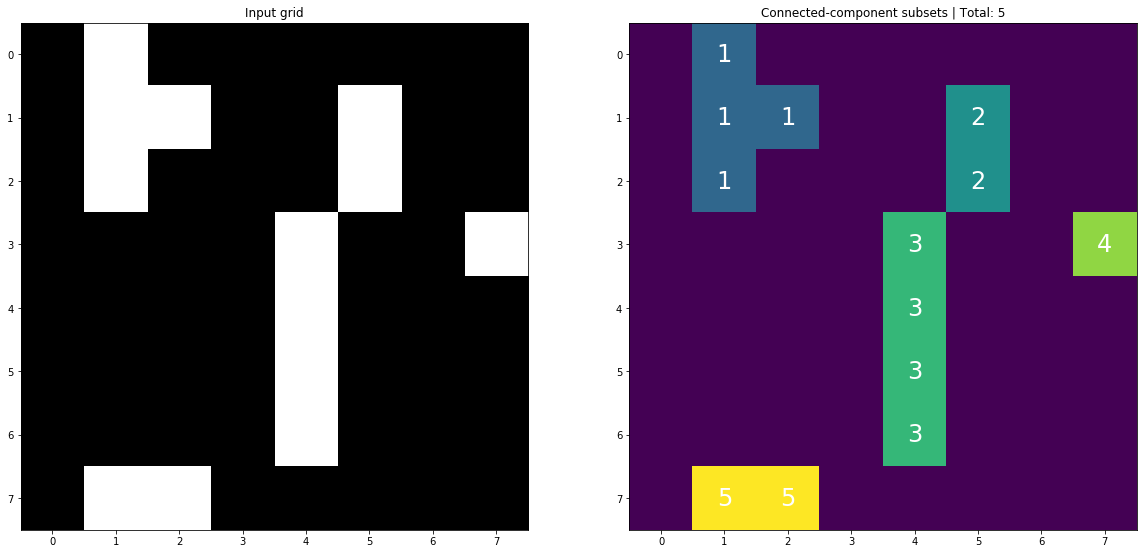

In [5]:
grid_labeled, subsets = connect4(grid)

visualize_grid(grid, grid_labeled, subsets)

## 8-conectivity
---
For each element $(x, y)$, this analysis consider as connected all neighbors that touch one of its corners.

$$ \large
\begin{bmatrix}
1 & & 1 & & 1 \\
 & \nwarrow & \uparrow & \nearrow \\
1 & \leftarrow & ? & \rightarrow & 1 \\
 & \swarrow & \downarrow & \searrow \\
 1 & & 1 & & 1
\end{bmatrix}
$$

In [6]:
def connect8(grid):
    '''
    Define number of subsets given the 8-connected neighborhood
    '''
    subsets = 0
    M, N = len(grid), len(grid[0])
    # 8-connected neighborhood offset
    connected_8 = [
        (1 , -1), (1 , 0), ( 1, 1),
        (0 , -1),          ( 0, 1),
        (-1, -1), (-1, 0), (-1, 1)
    ]
    # Matrix of labels
    labels = [[0 for _ in range(M)] for _ in range(N)]
    for m in range(M):
        for n in range(N):
            if labels[m][n]:
                # Ignore visited positions
                continue
            if not grid[m][n]:
                # Ignore invalid positions (p == 0)
                # and mark its labels as -1
                labels[m][n] = -1
                continue
            subsets += 1
            connected = [(m, n)]
            # Init scan from the current position
            for (s, t) in connected:
                neighborhood = set([None, *connected])
                # Search for valid neighbors
                neighborhood |= {*[_valid_neighborhood(
                    grid, labels, s + u, t + v, M, N
                ) for (u, v) in connected_8]}
                neighborhood.remove(None)
                # Include valid neighbors to the current scan
                connected += list([v for v in neighborhood if v not in connected])
                # Add subset label to the position [s, t]
                labels[s][t] = subsets
    return labels, subsets

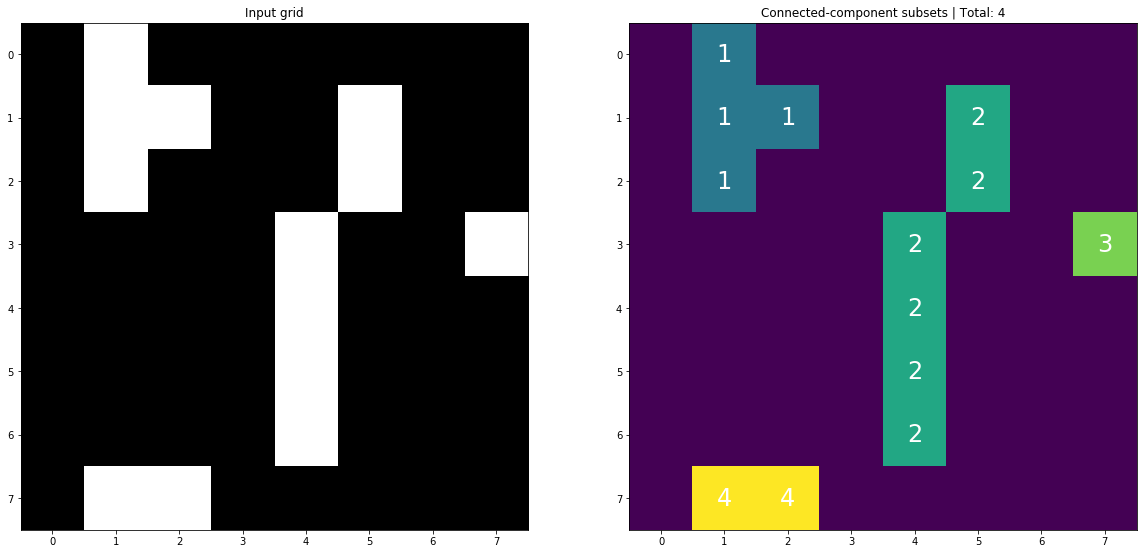

In [7]:
grid_labeled, subsets = connect8(grid)

visualize_grid(grid, grid_labeled, subsets)